<a href="https://colab.research.google.com/github/Disogu/Proyecto-3-CODERS-G9/blob/main/proyecto3(casas)_examen_g9_(Diego_Son%C3%AD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto-examen:

Objetivo General

El objetivo del examen es que cada estudiante desarrolle un portafolio completo con 4 proyectos aplicados de ML/DL, que reflejen tanto el dominio técnico como la capacidad de análisis y documentación en problemas reales.  Fecha de entrega 17 de mayo

2. Regresión (2 proyectos)

    Proyecto 3: Machine Learning tradicional

        Aplicar EDA completo.

        Selección de características con ganancia de información mutua.

        Comparar modelos con LazyPredict.

        Elegir modelo con mejor MSE (Mean Squared Error) o MAE (Mean Absolute Error).

        Registrar métricas y modelos con MLflow.

    Proyecto 4: Deep Learning

        Elegir un problema de pronóstico o regresión compleja (por ejemplo: series de tiempo o embeddings de texto).

        Diseñar una red neuronal adecuada para el problema (LSTM, GRU, redes densas, etc.).

        Evaluar con métricas de regresión (MSE, MAE).

        Usar MLflow para seguimiento de experimentos.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00


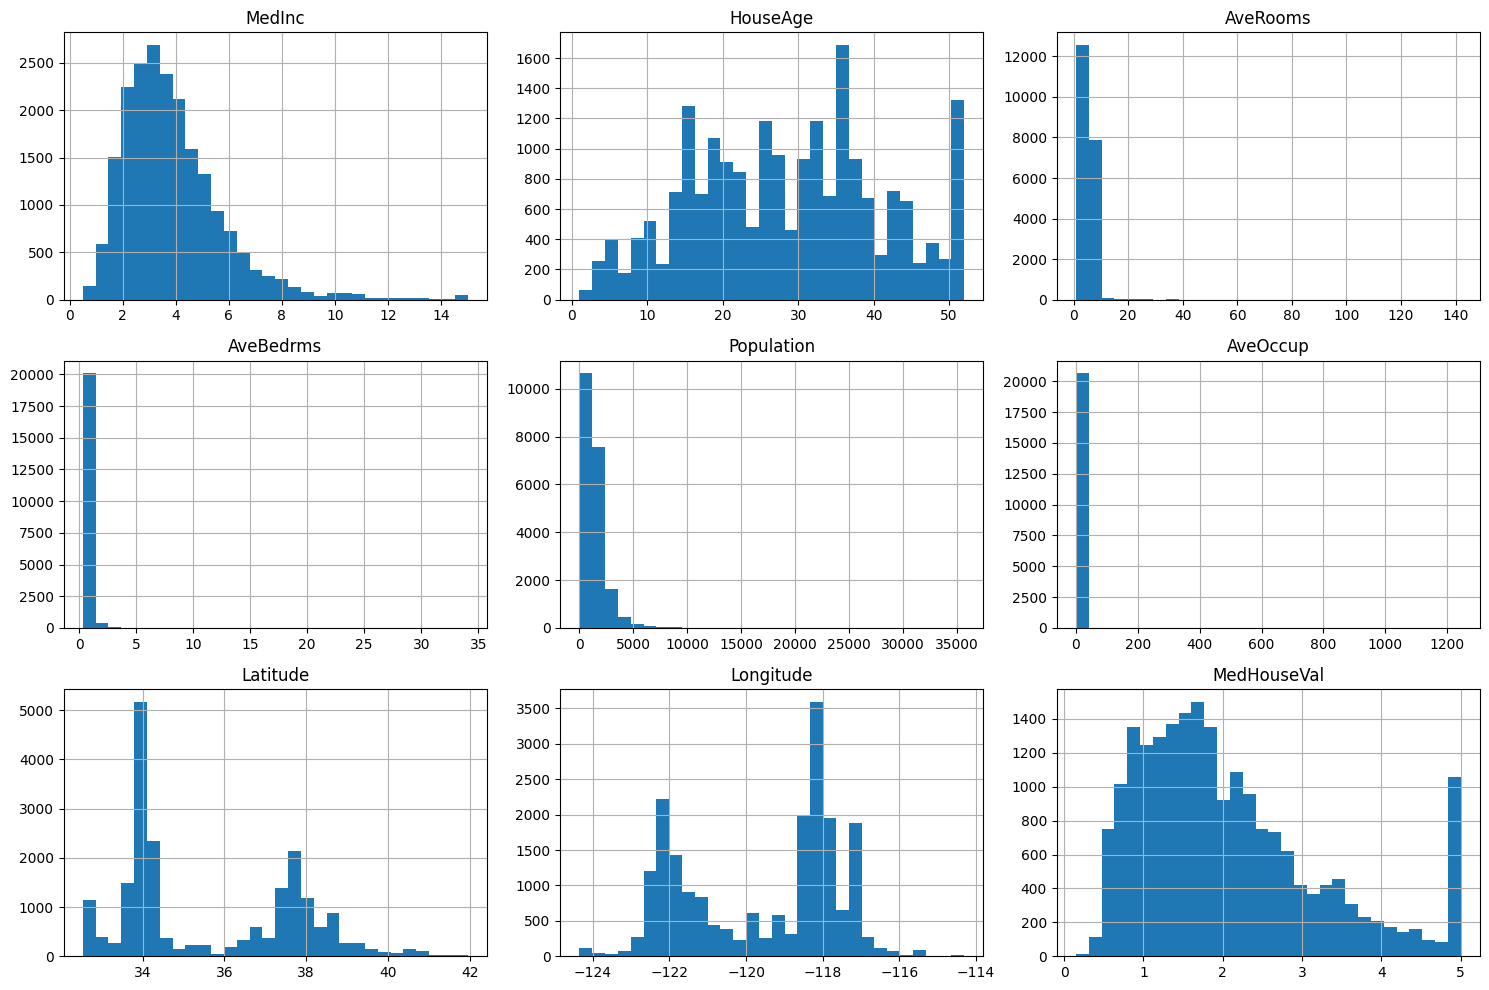

In [ ]:
# Paso 1: Exploratory Data Analysis (EDA)
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install lazypredict -q
!pip install mlflow -q
# Cargar datos
data = fetch_california_housing(as_frame=True)
df = data.frame

# Histogramas
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

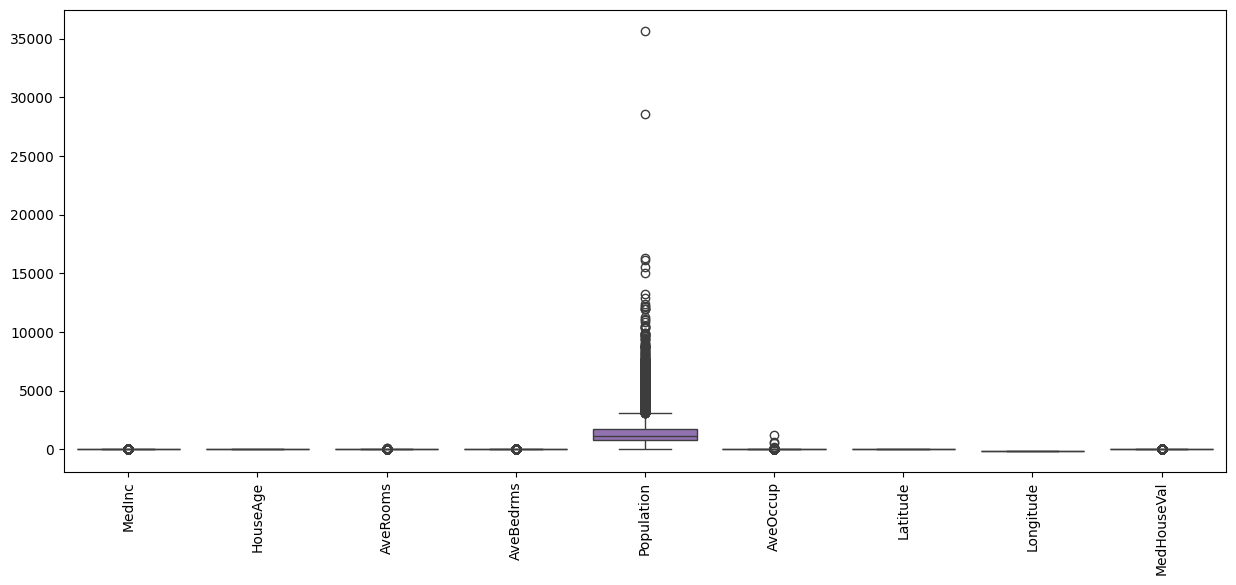

In [ ]:
# Boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

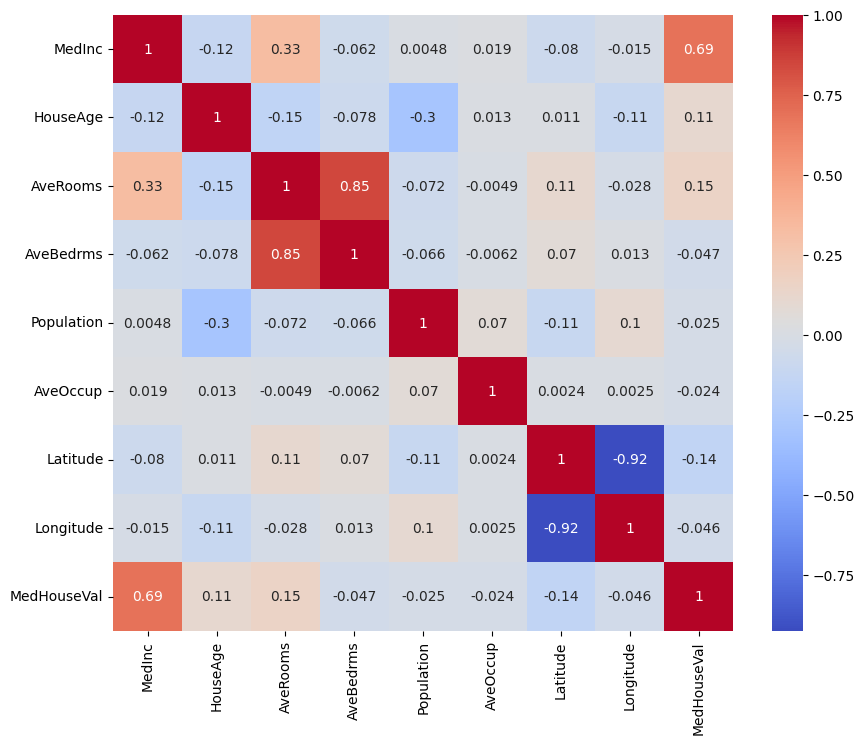

In [ ]:
# Correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Paso 2: Preprocesamiento y selección de características
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Información mutua
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Información mutua por característica:")
print(mi_series)

Información mutua por característica:
Longitude     0.401143
MedInc        0.387440
Latitude      0.370545
AveRooms      0.103313
AveOccup      0.072245
HouseAge      0.031000
AveBedrms     0.024835
Population    0.020891
dtype: float64


In [ ]:
# Selección de las más importantes
top_features = mi_series.head(6).index.tolist()
X_selected = X[top_features]

# Normalización
df_scaled = StandardScaler().fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Paso 3: Comparar modelos con LazyPredict
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 6
[LightGBM] [Info] Start training from score 2.071947
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
LGBMRegressor                                0.84       0.84   0.46   
XGBRegressor                                 0.84       0.84   0.46   
HistGradientBoostingRegressor                0.83       0.83   0.47   
ExtraTreesRegressor                          0.81       0.81   0.50   
RandomForestRegressor                        0.81       0.81   0.50   
BaggingRegressor                             0.79       0.79   0.53   
GradientBoostingRegressor                    0.77       0.77   0.54   
MLPRegressor        

In [ ]:
# Paso 4: Elegir mejor modelo, evaluar y registrar con MLflow
import mlflow
import mlflow.sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

with mlflow.start_run():
    mlflow.log_param("model", "GradientBoostingRegressor")
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("MAE", mae)
    mlflow.sklearn.log_model(best_model, "model")

print(f"MSE: {mse:.4f}, MAE: {mae:.4f}")

2025/05/13 00:15:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MSE: 0.2959, MAE: 0.3713


# Requisitos Técnicos de Cada Proyecto

Cada proyecto deberá contener:

4 notebooks o scripts, siguiendo el flujo de trabajo de [Pau Labarta](https://www.linkedin.com/posts/pau-labarta-bajo-4432074b_machinelearning-mlops-realworldml-activity-7137003082403442688-sD8x/):

        Análisis exploratorio.

        Preprocesamiento.

        Entrenamiento y validación del modelo.

        Evaluación final y exportación del modelo.

    Exploratory Data Analysis (EDA) en un notebook separado o como parte del flujo:

        Histogramas y gráficos de densidad

        Gráficos de barras y boxplots

        Detección de valores nulos y outliers

        Análisis de correlaciones

        Observaciones y tendencias relevantes

    README.md en cada repositorio que incluya:

        Objetivo del proyecto

        Descripción del dataset

        Decisiones tomadas en el modelado

        Resultados y métricas principales

    requirements.txt con las bibliotecas mínimas necesarias para correr el proyecto.

    Repositorio de GitHub individual para cada proyecto.

Extras Opcionales (Puntos Extra)

Contenerización del modelo con Docker y subida a DockerHub.

Aplicación funcional en alguna de las siguientes plataformas:

  * FastAPI + [ploomber](https://docs.cloud.ploomber.io/en/latest/apps/fastapi.html)  
  * [streamlit](https://streamlit.io/gallery?category=favorites)
  * [Chainlit](https://docs.chainlit.io/get-started/overview)

Evaluación comparativa entre modelos clásicos y redes neuronales en un pequeño informe adicional.

Notas Finales

* Uso de ChatGPT está permitido, pero debe mencionarse explícitamente si se usó para generar código o ideas.

* Si el problema elegido no es estrictamente de clasificación o regresión, puede ser aceptado previa consulta con el instructor.

* La calidad del código, la claridad en la documentación y la reproducibilidad serán factores clave en la evaluación.